# Peers

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('~/Downloads/2022_mlb_pitcher_values.csv')
df

,Rk,Name,Age,Tm,IP,G,GS,R,RA9,RA9opp,...,PPFp,RA9avg,RAA,WAA,gmLI,WAAadj,WAR,RAR,Salary,Name-additional
0,5,Jason Adam,30,TBR,63.1,67,0,12,1.71,4.37,...,93.2,3.86,15,1.7,1.58,0.3,2.7,21,900000,adamja01
1,6,Austin Adams,31,SDP,2.1,2,0,0,0.00,4.51,...,98.0,4.05,1,0.1,0.20,-0.1,0.1,1,925000,adamsau02
2,8,Ehire Adrianza,32,WSN,1.0,1,0,0,0.00,4.84,...,92.0,4.33,0,0.1,0.00,0.0,0.0,1,1500000,adriaeh01
3,10,Hanser Alberto,29,LAD,11.0,10,0,5,4.09,4.53,...,108.3,3.80,0,0.0,0.00,0.0,0.1,1,1350000,alberha01
4,12,Sandy Alcantara,26,MIA,228.2,32,32,67,2.64,4.60,...,98.0,4.61,50,5.9,NaN,-0.2,7.8,71,3800000,alcansa01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,852,Nick Wittgren,31,STL,29.0,29,0,19,5.90,4.28,...,92.5,3.26,-9,-0.9,0.74,0.0,-0.6,-6,1200000,wittgni01
281,853,Alex Wood*,31,SFG,130.2,26,26,78,5.37,4.24,...,100.8,4.82,-8,-0.8,NaN,-0.1,0.3,4,12500000,woodal02
282,855,Brandon Woodruff,29,MIL,153.1,27,27,56,3.29,4.18,...,100.1,4.10,14,1.5,NaN,-0.1,2.8,28,6800000,woodrbr01
283,862,Ryan Yarbrough*,30,TBR,80.0,20,9,44,4.95,4.47,...,95.6,4.19,-6,-0.7,0.72,-0.1,0.0,0,3850000,yarbrry01


In [3]:
df.columns

Index(['Rk', 'Name', 'Age', 'Tm', 'IP', 'G', 'GS', 'R', 'RA9', 'RA9opp',
       'RA9def', 'RA9role', 'RA9extras', 'PPFp', 'RA9avg', 'RAA', 'WAA',
       'gmLI', 'WAAadj', 'WAR', 'RAR', 'Salary', 'Name-additional'],
      dtype='object')

A bubble chart comparing IP, WAR, and Salary for all pitchers, with bubbles color-coded by team and sized by innings pitched.

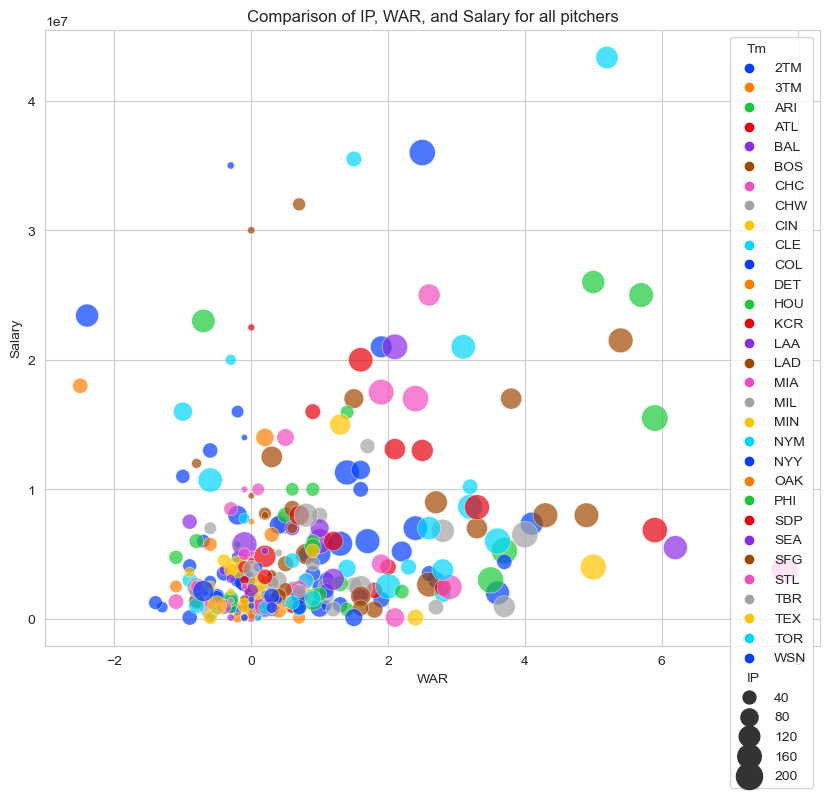

In [6]:
df1 = df.groupby(['Tm', 'Name']).agg({'IP': 'sum', 'WAR': 'mean', 'Salary': 'mean'}).reset_index()

team_palette = sns.color_palette('bright', n_colors=len(df1['Tm'].unique()))

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
bubblechart = sns.scatterplot(data=df1, x='WAR', y='Salary', hue='Tm', size='IP', sizes=(20, 400),
                              alpha=0.7, palette=team_palette)
bubblechart.set_title('Comparison of IP, WAR, and Salary for all pitchers')
bubblechart.set_xlabel('WAR')
bubblechart.set_ylabel('Salary')

plt.show()

A stacked bar chart showing the breakdown of each pitcher's WAR

<Figure size 1200x1000 with 0 Axes>

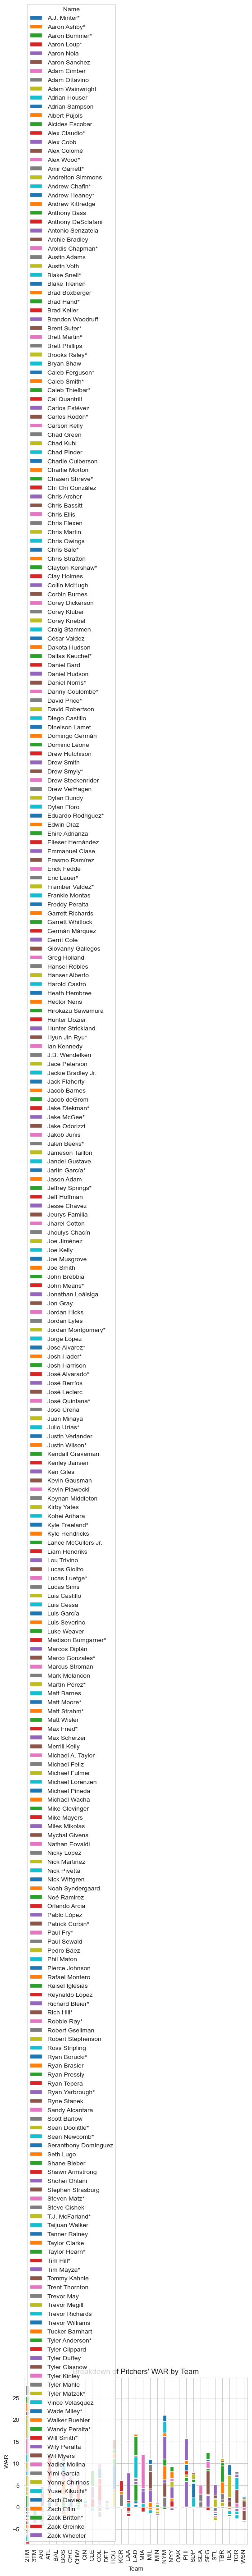

In [12]:
df2 = df.groupby(['Tm', 'Name']).agg({'WAR': 'sum'}).reset_index()

pivot_table = df2.pivot_table(index='Tm', columns='Name', values='WAR')

sns.set_style('whitegrid')
plt.figure(figsize=(12, 10))
stackedchart = pivot_table.plot(kind='bar', stacked=True)
stackedchart.set_title("Breakdown of Pitchers' WAR by Team")
stackedchart.set_xlabel('Team')
stackedchart.set_ylabel('WAR')

plt.show()

A scatter plot comparing RA9avg and RA9opp for all pitchers.

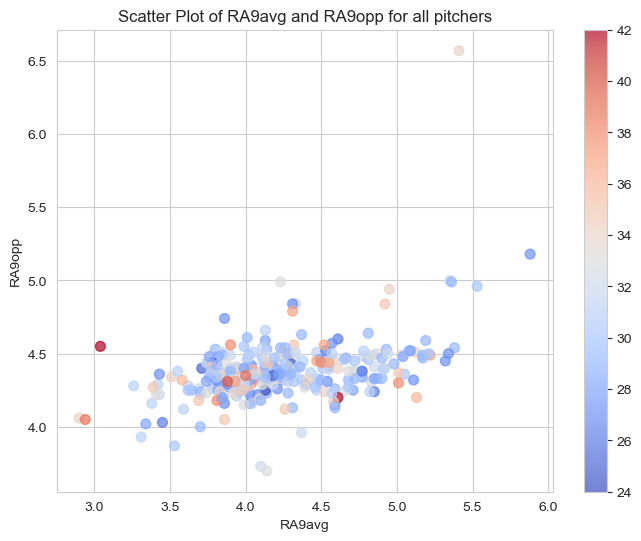

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df['RA9avg'], df['RA9opp'], c=df['Age'], cmap='coolwarm', s=50, alpha=0.7)
plt.colorbar()
plt.xlabel('RA9avg')
plt.ylabel('RA9opp')
plt.title('Scatter Plot of RA9avg and RA9opp for all pitchers')
plt.show()